# MLP CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CROP.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['label']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [7]:
x1 = df.drop(labels='label', axis=1)
y1 = df.loc[:,'label']

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({20: 100, 11: 100, 3: 100, 9: 100, 18: 100, 13: 100, 14: 100, 2: 100, 10: 100, 19: 100, 1: 100, 12: 100, 7: 100, 21: 100, 15: 100, 0: 100, 16: 100, 17: 100, 4: 100, 6: 100, 8: 100, 5: 100})
OVER SAMPLING DATA COUNT  :  Counter({20: 100, 11: 100, 3: 100, 9: 100, 18: 100, 13: 100, 14: 100, 2: 100, 10: 100, 19: 100, 1: 100, 12: 100, 7: 100, 21: 100, 15: 100, 0: 100, 16: 100, 17: 100, 4: 100, 6: 100, 8: 100, 5: 100})


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  1760
NUMBER OF TEST DATASET      :  440
TOTAL NUMBER OF DATASET    :  2200


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  1760
NUMBER OF TEST DATASET      :  440
TOTAL NUMBER OF DATASET    :  2200


In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
MLP = MLPClassifier()
MLP.fit(x_train,y_train)

MLPClassifier()

In [13]:
predicted = MLP.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print('ACCURACY OF THIS MODEL :\n\n', accuracy*100)

ACCURACY OF THIS MODEL :

 93.86363636363636


In [15]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF MLP CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF MLP CLASSIFIER:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.71      0.85      0.77        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.77      1.00      0.87        20
           7       1.00      1.00      1.00        20
           8       1.00      0.55      0.71        20
           9       1.00      1.00      1.00        20
          10       0.94      0.85      0.89        20
          11       0.93      0.70      0.80        20
          12       1.00      1.00      1.00        20
          13       0.83      0.75      0.79        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00 

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER:


 [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  1  0  0 15  0  0  0  

In [17]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(MLP, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [96.13636364 95.68181818 96.13636364 96.36363636 96.59090909]


In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF MLP CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF MLP CLASSIFIER IS : 93.86363636363636


In [19]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF MLP CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF MLP CLASSIFIER IS : 6.136363636363637


THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER:


[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  1  0  0 15  0  0  0  0

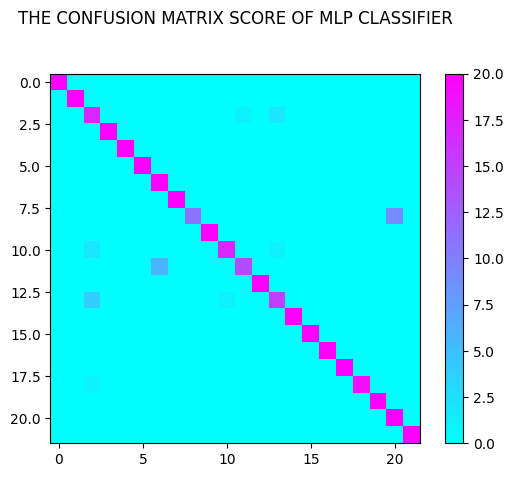

In [20]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

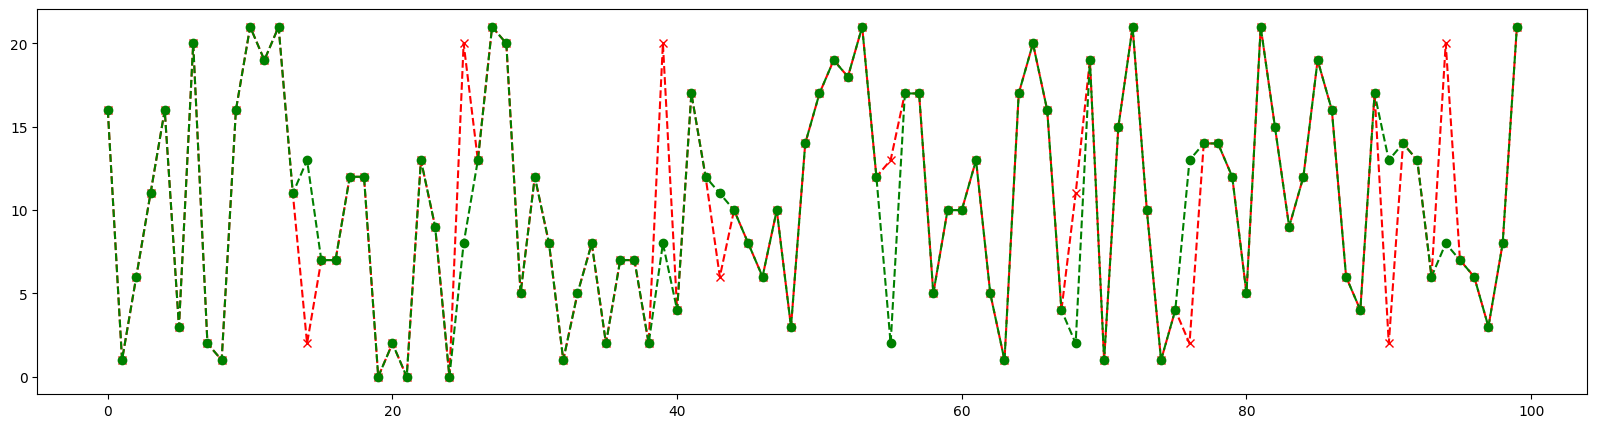

In [21]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()